In [1]:
# importing the essiantial Classes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the CSV file
data = pd.read_csv('E:/Datascience_Data/day.csv')

# ------------------------------------Exploratory Data Analysis ------------------------------- 

In [3]:
data.tail() # checking the data
data.head() 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data.drop('instant',axis=1,inplace=True) # instant variable is as good as index

In [5]:
data.info() # there is no null value present in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [6]:
data.nunique() # checking the unique values, it helps to judge the desired data type of variables

dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

### Seprating Continous and Categorical  Variables

In [4]:
catagorical_vars = data.columns[1:8]
catagorical_vars

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [5]:
continous_vars = data.columns[8:]
continous_vars

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

## Lets check the season wise count of bike hiring

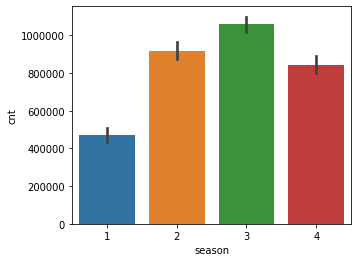

In [9]:
plt.figure(figsize=(5,4))
sns.barplot(data=data,x='season',y='cnt',estimator=sum)

In [10]:
data.groupby('season')['cnt'].sum()

season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

### During Fall the bike hiring is maximum

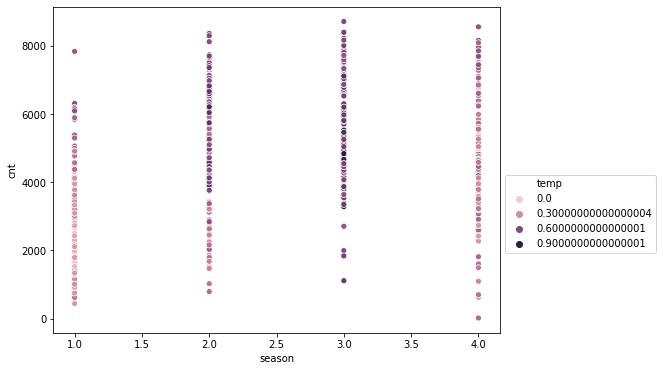

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='season',y='cnt',hue='temp',legend='brief')
plt.legend(loc ='best',bbox_to_anchor=(1, 0., 0., 0.5))

### Above graph shows temprature is moderate(.3&.6 range) bike hiring increases.

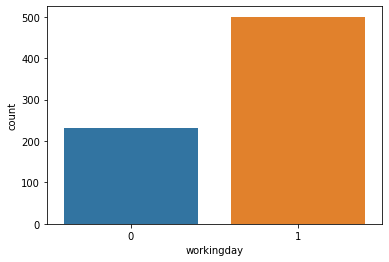

In [6]:
sns.countplot(x='workingday',data=data)

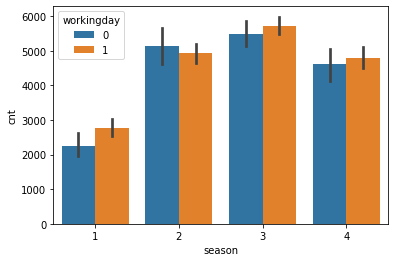

In [12]:
sns.barplot(x='season',y='cnt',data=data,hue=('workingday'))


In [13]:
data[data['season']==3].head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
171,2011-06-21,3,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774,4061,4835
172,2011-06-22,3,0,6,0,3,1,1,0.733333,0.693829,0.707500,0.172262,661,3846,4507
173,2011-06-23,3,0,6,0,4,1,2,0.728333,0.693833,0.703333,0.238804,746,4044,4790
174,2011-06-24,3,0,6,0,5,1,1,0.724167,0.656583,0.573333,0.222025,969,4022,4991
175,2011-06-25,3,0,6,0,6,0,1,0.695000,0.643313,0.483333,0.209571,1782,3420,5202


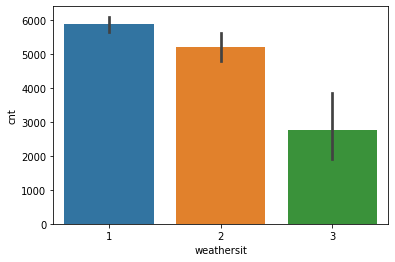

In [9]:
sns.barplot(data=data[data['season']==3],x='weathersit',y='cnt')

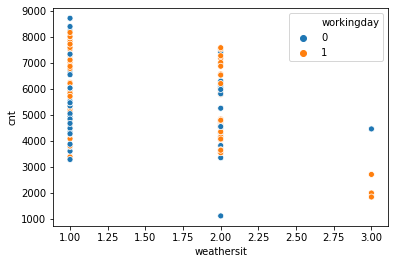

In [14]:

sns.scatterplot(data=data[data['season']==3],x='weathersit',y='cnt',hue=('workingday'))

### above graph depicts during Fall , 
### weather is Clear, Few clouds, Partly cloudy ---- bike sharing is high for non working day
### weather is  Mist + Cloudy, Mist + Broken clouds ---- Bike sharing is high for working day
### weather is not good---- people hardly hire bike.

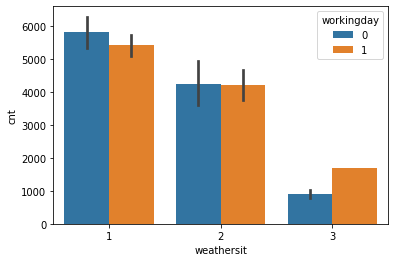

In [11]:
sns.barplot(data=data[data['season']==2],x='weathersit',y='cnt',hue=('workingday'))

### Same case when season is Summer
### weather is nice n safe -Bike hiring is high for non working day

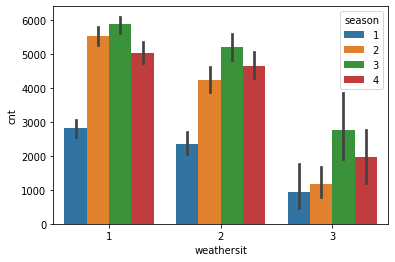

In [16]:
sns.barplot(data=data,x='weathersit',y='cnt',hue='season')

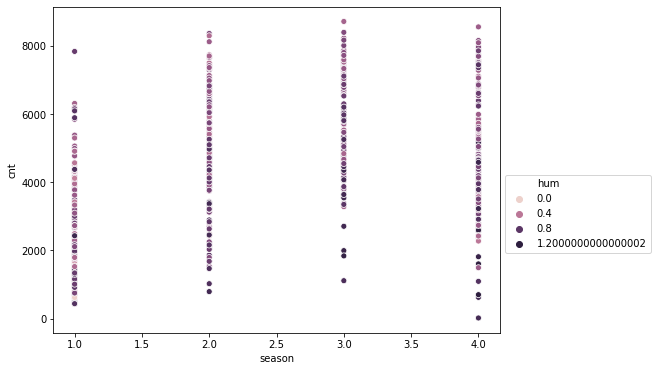

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='season',y='cnt',hue='hum',legend='brief')
plt.legend(loc ='best',bbox_to_anchor=(1, 0., 0., 0.5))

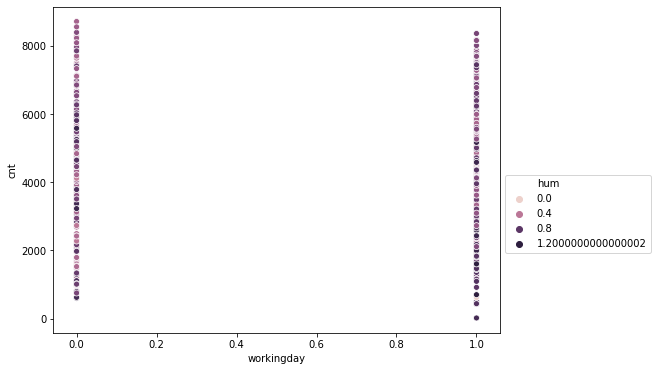

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='workingday',y='cnt',hue='hum',legend='brief')
plt.legend(loc ='best',bbox_to_anchor=(1, 0., 0., 0.5))

### Humidity is not showing the significant impact on bike hiring.
### either on working day or non working day..
### neither Season wise

    ### -------------------- Checking the count in weekday and weekend --------

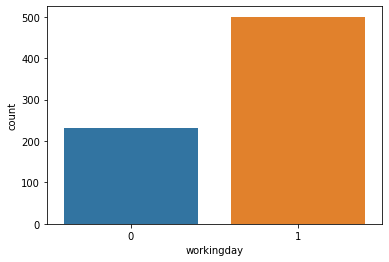

In [7]:
sns.countplot(x='workingday',data=data)

In [19]:
data[(data['holiday']==0) & (data['workingday']==0)]['cnt'].sum() # WEEKEND

921834

In [20]:
data[(data['holiday']==0) & (data['workingday']==1)]['cnt'].sum() # WEEKDAYS

2292410

    ### --- On comparing Both the counts it seems like proportaional because  2292410/921834 = 2.5 approx
    ###     and 5days/2days = 2.5

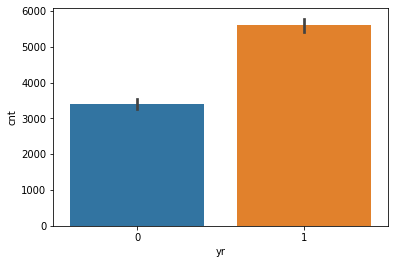

In [21]:
sns.barplot(data=data,x='yr',y='cnt') 

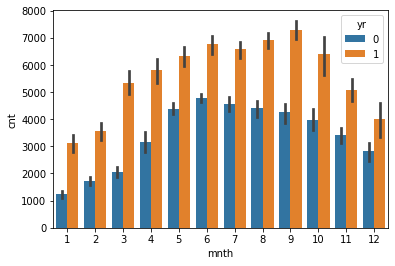

In [22]:
sns.barplot(data=data,x='mnth',y='cnt',hue='yr') 

# Data Preprocessing
## Converting the variables into proper data types

In [23]:
for i in catagorical_vars:
    data.loc[:,i] = data.loc[:,i].astype(object)

### Outlier analysis

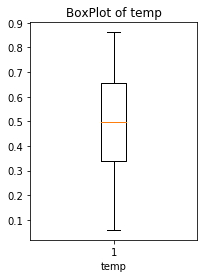

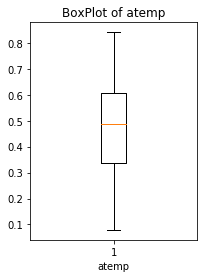

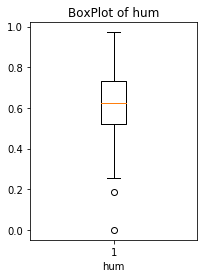

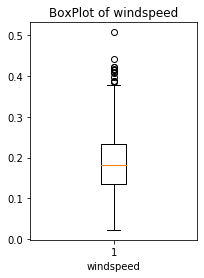

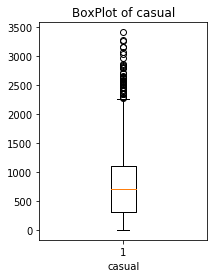

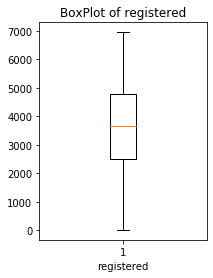

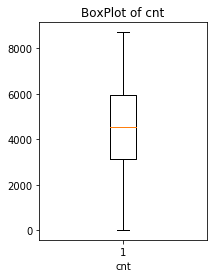

In [24]:

for i in continous_vars:
    
    
    plt.figure(figsize=(3,4))
    plt.boxplot(data[i])
    plt.title('BoxPlot of '+str(i))
    plt.xlabel(i)
    plt.show()
    

In [25]:
for i in continous_vars:
    #defining q75,q25 percentile
    q75,q25 = np.percentile(data[i],[75,25])
    # defining inter Quartile range
    iqr = q75 - q25
    # defining outer n inner fences
    maxim = q75 +(iqr*1.5)
    minim = q25 - (iqr*1.5)
    # replacing outliers with NAN
    data.loc[data[i]>maxim,i] = np.nan
    data.loc[data[i]<minim,i] = np.nan

In [26]:
data.isnull().sum()

dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64

In [27]:
data.drop('dteday',axis=1,inplace=True)

In [28]:
from fancyimpute import KNN

Using TensorFlow backend.


In [29]:
data = pd.DataFrame(KNN(k=3).fit_transform(data),columns=data.columns)

Imputing row 1/731 with 0 missing, elapsed time: 0.092
Imputing row 101/731 with 0 missing, elapsed time: 0.092
Imputing row 201/731 with 0 missing, elapsed time: 0.093
Imputing row 301/731 with 0 missing, elapsed time: 0.093
Imputing row 401/731 with 0 missing, elapsed time: 0.093
Imputing row 501/731 with 0 missing, elapsed time: 0.094
Imputing row 601/731 with 0 missing, elapsed time: 0.095
Imputing row 701/731 with 0 missing, elapsed time: 0.095


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
season        731 non-null float64
yr            731 non-null float64
mnth          731 non-null float64
holiday       731 non-null float64
weekday       731 non-null float64
workingday    731 non-null float64
weathersit    731 non-null float64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null float64
cnt           731 non-null float64
dtypes: float64(14)
memory usage: 80.0 KB


In [31]:
for i in catagorical_vars:
    data.loc[:,i] = data.loc[:,i].astype(object)

###  ----- Feature Selection
#### -- Corelational Analysis

In [32]:
data.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991702,0.122696,-0.143336,0.585304,0.540012,0.627494
atemp,0.991702,1.000000,0.136306,-0.168733,0.585259,0.544192,0.631066
hum,0.122696,0.136306,1.000000,-0.204320,-0.084342,-0.114173,-0.123748
windspeed,-0.143336,-0.168733,-0.204320,1.000000,-0.171367,-0.205767,-0.218945
casual,0.585304,0.585259,-0.084342,-0.171367,1.000000,0.414823,0.679621
registered,0.540012,0.544192,-0.114173,-0.205767,0.414823,1.000000,0.945517
cnt,0.627494,0.631066,-0.123748,-0.218945,0.679621,0.945517,1.000000


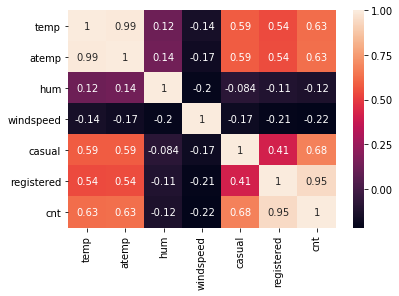

In [33]:
sns.heatmap(data.corr(),annot=True)

In [34]:
data.drop(['registered','atemp','casual'],axis=1,inplace=True) # dropping the variables due to multi-colinearity

### ----Anova test to select Categorical features

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [36]:
mod1 = ols('cnt ~ holiday',data=data).fit()
anova_tab1 = sm.stats.anova_lm(mod1, type=2)
print(anova_tab1)

             df        sum_sq       mean_sq         F    PR(>F)
holiday     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2.726738e+09  3.740381e+06       NaN       NaN


In [37]:
for i in catagorical_vars:
    print('------Table Starts here------')
    print(i)
    mod = ols('cnt ~ data[i]',data=data).fit()
    anova_tab = sm.stats.anova_lm(mod,type=2)
    print(anova_tab)
    print('------Table ends here------')

------Table Starts here------
season
             df        sum_sq       mean_sq           F        PR(>F)
data[i]     3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual  727.0  1.788940e+09  2.460715e+06         NaN           NaN
------Table ends here------
------Table Starts here------
yr
             df        sum_sq       mean_sq           F        PR(>F)
data[i]     1.0  8.798289e+08  8.798289e+08  344.890586  2.483540e-63
Residual  729.0  1.859706e+09  2.551038e+06         NaN           NaN
------Table ends here------
------Table Starts here------
mnth
             df        sum_sq       mean_sq          F        PR(>F)
data[i]    11.0  1.070192e+09  9.729021e+07  41.903703  4.251077e-70
Residual  719.0  1.669343e+09  2.321757e+06        NaN           NaN
------Table ends here------
------Table Starts here------
holiday
             df        sum_sq       mean_sq         F    PR(>F)
data[i]     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2

###  Anova Test suggests to drop holiday,working day

In [38]:
data.drop(['holiday','workingday'],axis=1,inplace=True)

In [39]:
data.head()

,season,yr,mnth,weekday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,2,0.344167,0.805833,0.160446,985.0
1,1,0,1,0,2,0.363478,0.696087,0.248539,801.0
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0
3,1,0,1,2,1,0.200000,0.590435,0.160296,1562.0
4,1,0,1,3,1,0.226957,0.436957,0.186900,1600.0


### -----------Feature Scaling
#### ----- Checking the distribution

In [40]:
# updating the continous variables
continous_vars = data.select_dtypes(exclude=object).columns
continous_vars

Index(['temp', 'hum', 'windspeed', 'cnt'], dtype='object')

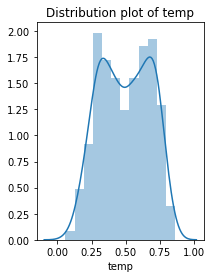

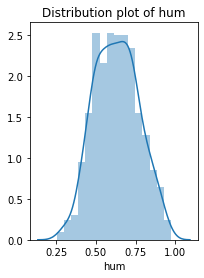

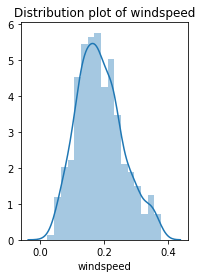

In [41]:
for i in continous_vars:
    if i == 'cnt':
        continue
    plt.figure(figsize=(3,4))
    sns.distplot(data[i])
    plt.title('Distribution plot of '+ str(i))
    plt.xlabel(i)
    plt.show()

### Data seems normaly distributed

In [42]:
datacopy = data.copy()          # making a copy of data

#### --- using getDummies for categorical variables

In [130]:
#data = pd.get_dummies(data=data,drop_first=True)

In [131]:
#data.head()

,temp,hum,windspeed,casual,cnt,season_2.0,season_3.0,season_4.0,yr_1.0,mnth_2.0,...,mnth_11.0,mnth_12.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weathersit_2.0,weathersit_3.0
0,-0.826662,1.260317,-0.369273,-0.803903,985.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,-0.721095,0.475996,0.866149,-1.138307,801.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.634657,-1.373666,0.862924,-1.156699,1349.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-1.614780,-0.279065,-0.371377,-1.176764,1562.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-1.467414,-1.375924,0.001720,-1.220236,1600.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## --------------- Model Preparation ------

In [43]:
#splitting the data
from sklearn.model_selection import train_test_split

In [44]:
X = data.drop('cnt',axis=1)
y = data['cnt']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Random forest Regressor Model


In [46]:
from sklearn.ensemble import RandomForestRegressor # importing the model class

In [47]:
rFrmodel = RandomForestRegressor(n_estimators=100) # instantiating the model

In [48]:
rFrmodel.fit(X_train,y_train) # traning the model with train Data

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
rFrPredict = rFrmodel.predict(X_test) # prediction 

In [50]:
from sklearn import metrics

In [51]:
print('MAE',metrics.mean_absolute_error(y_test,rFrPredict))
print('MSE',metrics.mean_squared_error(y_test,rFrPredict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,rFrPredict)))
print('MAPE:',np.mean(np.abs((y_test-rFrPredict)/y_test))*100)
print('R-Sq:', metrics.r2_score(y_test,rFrPredict))

MAE 404.4747272727273
MSE 296550.5935254546
RMSE 544.5645907745513
MAPE: 12.619964720683937
R-Sq: 0.9144359104973715


In [41]:
print(rFrmodel.feature_importances_)

[0.02418764 0.1799586  0.0265633  0.02088073 0.00428147 0.12081555
 0.0345811  0.02086647 0.56786513]


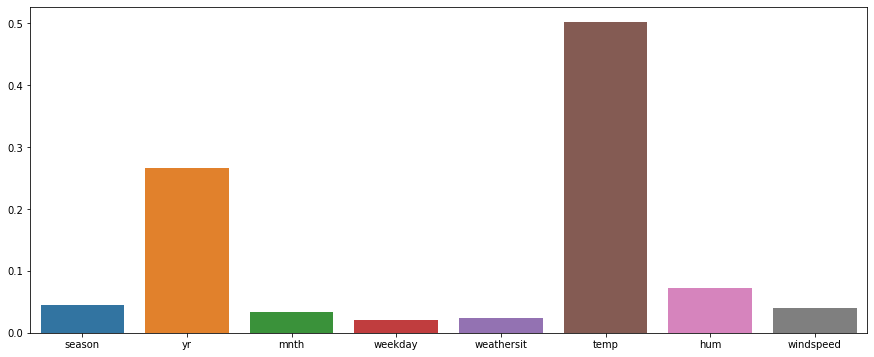

In [52]:
plt.figure(figsize=(15,6))
sns.barplot(x=data.columns[:-1],y=rFrmodel.feature_importances_)

In [53]:
compare_rFr = pd.DataFrame({'Actual':y_test, 'Predict':rFrPredict})

In [55]:
compare_rFr.head()

,Actual,Predict
479,5633.0,5530.65
648,7691.0,7501.50
139,4917.0,4882.49
601,7582.0,7552.66
116,3872.0,3466.40


Text(0.5, 1.0, 'Plot for RandomForestRegression')

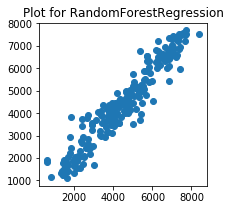

In [57]:
plt.figure(figsize=(3,3))
plt.scatter(y_test,rFrPredict)
plt.title('Plot for RandomForestRegression')

### Plot and compare metrics seems good predicted values are quite close to actual values

## --------------------------------- Linear Regression model

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lR = LinearRegression()

In [60]:
lR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
lRpredict = lR.predict(X_test)

In [62]:
compare_lR = pd.DataFrame({'Actual':y_test, 'Predict': lRpredict})

In [63]:
compare_lR.head()

,Actual,Predict
479,5633.0,5083.760454
648,7691.0,6467.035298
139,4917.0,3964.591780
601,7582.0,6840.545771
116,3872.0,3032.794344


In [64]:
print('MAE',metrics.mean_absolute_error(y_test,lRpredict))
print('MSE',metrics.mean_squared_error(y_test,lRpredict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,lRpredict)))
print('MAPE:',np.mean(np.abs((y_test-lRpredict)/y_test))*100)
print('R-Sq:', metrics.r2_score(y_test,lRpredict))

MAE 570.0211727866575
MSE 559658.3740398495
RMSE 748.103184086159
MAPE: 15.377919361757925
R-Sq: 0.8385211149370677


Text(0.5, 1.0, 'Plot for LinearRegression')

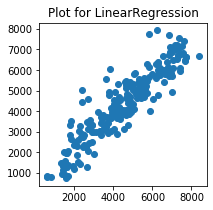

In [65]:
plt.figure(figsize=(3,3))
plt.scatter(y_test,lRpredict)
plt.title('Plot for LinearRegression')

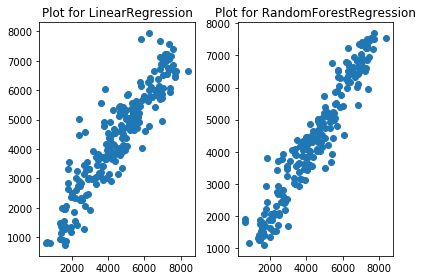

In [69]:
plt.subplot(1,2,1)

plt.scatter(y_test,lRpredict)
plt.title('Plot for LinearRegression')

plt.subplot(1,2,2)

plt.scatter(y_test,rFrPredict)
plt.title('Plot for RandomForestRegression')

plt.tight_layout()